<!--NOTEBOOK_HEADER-->
*This notebook contains material from [PyRosetta](https://RosettaCommons.github.io/PyRosetta.notebooks);
content is available [on Github](https://github.com/RosettaCommons/PyRosetta.notebooks.git).*

# Introducción a Jupyter y PyRosetta

**Jupyter Notebook.** Es un documento que integra texto, código y _output_ del código. Combina narración y visualización de los resultados.

Ofrece **sistematización** y **reproducibilidad**.

En esencia es un documento integrado en el que se puede ejecutar código, mostrar el resultado y añadir explicaciones, fórmulas, gráficas... De este modo el análisis que se presenta resulta más legible, transparente y reproducible. Además es fácil de compartir.

Más información, documentación, instrucciones de instalación... en [jupyter.org](jupyter.org)

## Primer contacto con Jupyter

Este es el primer notebook que tenemos. Lo hemos creado con el menú New en el server Python que hemos lanzado. Todo lo que compone este cuaderno son celdas. Échale un vistazo al menú superior, verás que parece un procesador de textos vitaminado.

En el cuaderno, todo son celdas. Las celdas pueden ser de texto (Markdown) o de código (Python).
La primera celda que te aparece es de código, puedes cambiarla a texto con el menú desplegable.

El texto se escribe en un lenguaje de marcado de texto llamado Markdown, que tiene una forma particular de poner texto en **negrita**, _itálica_... Puedes aprender más sobre Markdown preguntándole a GPT-4.

Vamos a jugar con el código. Escribe `print('Hello World!')` en la celda que tienes disponible y pulsa el botón **Run** o las teclas Ctrl + Enter.

In [ ]:
# print('Hello World!')

Con Python se pueden realizar operaciones aritméticas:

In [ ]:
a = 12
b = 2
print("a + b = ", a + b)
print("a**b = ", a + b)
print("a/b = ", a/b)

a + b =  14
a**b =  14
a/b =  6.0


Muchas operaciones matemáticas se realizan con el módulo `numpy`. La celda siguiente importa este módulo con el prefijo `np`y lo usa para calcular una función conocida

In [ ]:
import numpy as np
np.sin(2*np.pi)

-2.4492935982947064e-16

El módulo (o _library_) `matplotlib.pyplot` permite hacer gráficas:

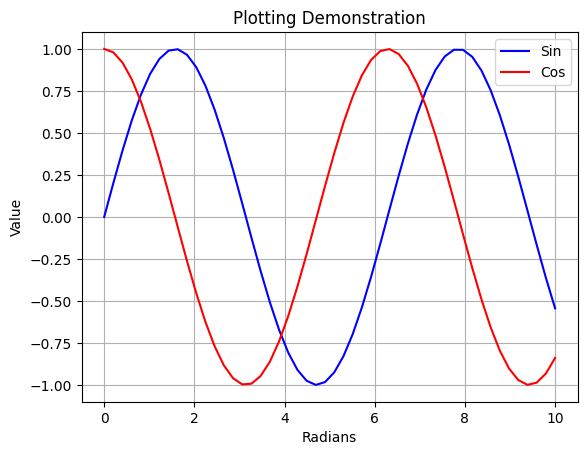

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.linspace(0,10)
y = np.sin(x)
z = np.cos(x)

plt.plot(x,y,'b',x,z,'r')
plt.xlabel('Radians');
plt.ylabel('Value');
plt.title('Plotting Demonstration')
plt.legend(['Sin','Cos'])
plt.grid(True)

(-1.09972447591003,
 1.0979832896606587,
 -1.0992804688576738,
 1.0999657366122702)

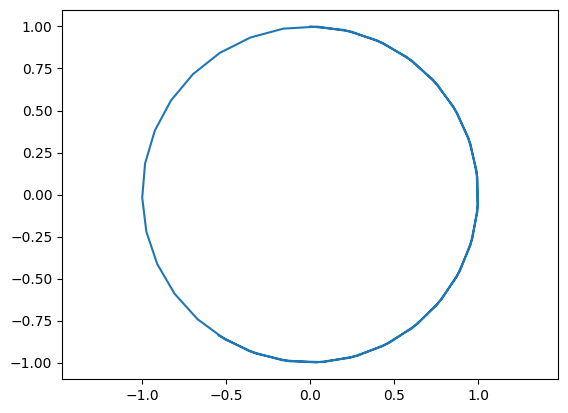

In [ ]:
plt.plot(y,z)
plt.axis('equal')

Text(0.5, 1.0, 'Cos(x)')

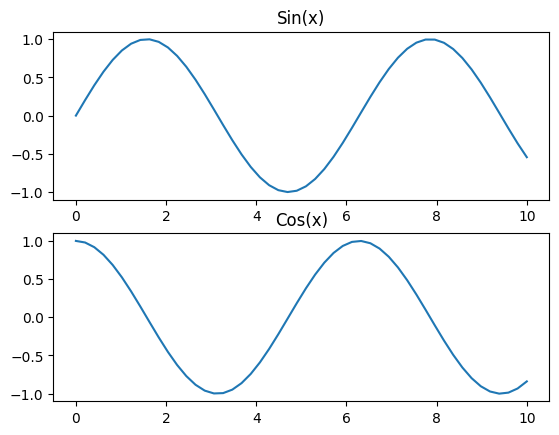

In [ ]:
plt.subplot(2,1,1)
plt.plot(x,y)
plt.title('Sin(x)')

plt.subplot(2,1,2)
plt.plot(x,z)
plt.title('Cos(x)')

En este punto es interesante que consideres aprender un poco de Python, para ampliar tus conocimientos de bioquímica. Recuerda que la bioquímica es bioquímica computacional.

## PyRosetta

Rosetta is a suite of algorithms for biomolecular structure prediction and design. Rosetta is written in C++ and is available from www.rosettacommons.org. PyRosetta is a toolkit in the programming language Python, which encapsulates the Rosetta functionality by using the
compiled C++ libraries.

The main Rosetta docs can be found here: https://www.rosettacommons.org/docs/latest/Home, and here is another link for getting started: https://www.rosettacommons.org/docs/latest/getting_started/Getting-Started.

It should be noted, that while some Rosetta/PyRosetta functionality can be achieved on a local computer, a computational cluster is generally recommended to use for more in-depth structure prediction and design tasks.


### Setup files in Colab

Use the drive module from google.colab to mount your entire Google Drive to Colab by:

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Check where we are working

In [4]:
!pwd
!ls

/content
gdrive	sample_data


In [11]:
!ls gdrive/MyDrive/BIP_24-25/clase_1
!cd gdrive/MyDrive/BIP_24-25/clase_1/
!pwd

5tj3.pdb			      clase1-pose.ipynb
clase1-intro_Jupyter_PyRosetta.ipynb  Copy_clase1-intro_Jupyter_PyRosetta.ipynb
/content


### Init PyRosetta

We need to load the PyRosetta Python module, and to define the path to load files from and write files to.

In [ ]:
!pip install pyrosettacolabsetup
import pyrosettacolabsetup; pyrosettacolabsetup.install_pyrosetta()
import pyrosetta; pyrosetta.init()

Mounted at /content/google_drive

Note that USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE.
See https://github.com/RosettaCommons/rosetta/blob/main/LICENSE.md or email license@uw.edu for details.

Looking for compatible PyRosetta wheel file at google-drive/PyRosetta/colab.bin//wheels...
Found compatible wheel: /content/google_drive/MyDrive/PyRosetta/colab.bin/wheels//content/google_drive/MyDrive/PyRosetta/colab.bin/wheels/pyrosetta-2024.19+release.a34b73c40f-cp310-cp310-linux_x86_64.whl


┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENS

In [ ]:
from pyrosetta import *
init()

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.MinSizeRel.python310.ubuntu 2024.19+release.a34b73c40fe9c61558d566d6a63f803cfb15a4fc 2024-05-02T16:22:03] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.MinSizeRel.python310.ubuntu r381 2024.19+release.a34b73c40f a34b

In [ ]:
import os
notebook_path = os.path.abspath("clase1-intro_Jupyter_PyRosetta.ipynb")

In [ ]:

!ls google_drive/MyDrive/BIP_24-25/clase_1

5tj3.pdb  clase1-intro_Jupyter_PyRosetta.ipynb	clase1-pose.ipynb


### Load a pdb file

Protein Data Bank (PDB) is a text file format for describing 3D molecular structures and other information. Rosetta can read in PDB files and can output them as well. In addition to PDB, mmTF and mmCIF are a couple other file formats that are used with Rosetta.

We will spend some time looking at the crystal structure for the protein PafA (PDB ID: 5tj3) using Pyrosetta. PafA is an alkaline phosphatase, which removes a phosphate group from a phosphate monoester. In this structure, a modified amino acid, phosphothreonine, is used to mimic the substrate in the active site. Let's load in this structure with PyRosetta (make sure that you have the PDB file located in your current directory):

In [ ]:
#pdb_file = os.path.join(os.path.dirname(notebook_path), "5tj3.pdb")
pdb_file = "google_drive/MyDrive/BIP_24-25/clase_1/5tj3.pdb"
pose = pose_from_pdb(pdb_file)

core.import_pose.import_pose: File 'google_drive/MyDrive/BIP_24-25/clase_1/5tj3.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 233
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD1 on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD2 on residue ASP 350
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 353
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 353
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 353
co

### Accessing PyRosetta Documentation

The full documentaton for PyRosetta can be found here: https://graylab.jhu.edu/PyRosetta.documentation/. You can use it to search for or learn more about any method in PyRosetta.

sample_data


In [12]:
!jupyter nbconvert "gdrive/MyDrive/BIP_24-25/clase_1/Copy_clase1-intro_Jupyter_PyRosetta.ipynb" --to html

[NbConvertApp] Converting notebook gdrive/MyDrive/BIP_24-25/clase_1/Copy_clase1-intro_Jupyter_PyRosetta.ipynb to html
[NbConvertApp] Writing 761388 bytes to gdrive/MyDrive/BIP_24-25/clase_1/Copy_clase1-intro_Jupyter_PyRosetta.html


In [14]:
!ls gdrive

MyDrive  Shareddrives
